In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ5000GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

410244
199770
439758


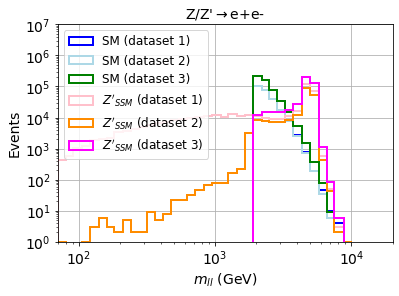

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ5000GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ5000GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-5000-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-5000-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-5000-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-5000-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-5000-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-5000-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3






# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.385648
0.879466
(885641,)
(885641,)
(885641,)
(885641,)
(885641,)
(885641,)
(885641,)
(885641,)
(885641,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.469
2.469
-2.469
2.469


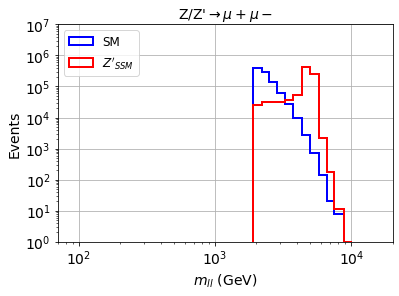

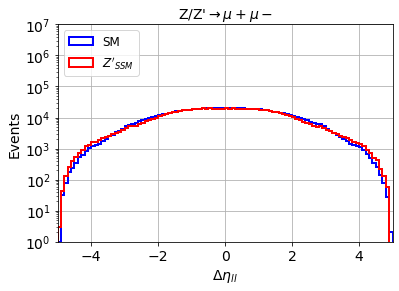

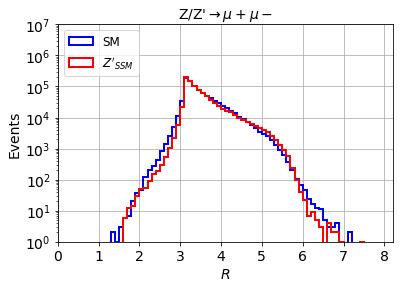

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.185525  0.458097  0.458625  0.213083  0.617409  0.964036  0.011698   
1        0.105476  0.242713  0.782623  0.134066  0.738462  0.299013  0.046466   
2        0.236823  0.516397  0.277371  0.268319  0.470648  0.789306  0.055798   
3        0.148065  0.424089  0.408498  0.177052  0.895951  0.924570  0.120553   
4        0.208545  0.415182  0.181254  0.232257  0.386235  0.636219  0.013300   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.300855  0.299798  0.655315  0.326100  0.762146  0.154997  0.424167   
1499996  0.334749  0.225709  0.490611  0.361277  0.642713  0.988861  0.429024   
1499997  0.215051  0.279150  0.403724  0.223579  0.928947  0.831158  0.483472   
1499998  0.201851  0.495749  0.094048  0.218412  0.495547  0.593571  0.003218   
1499999  0.523741  0.429150  0.191279  0.567866  0.511134  0.690325  0.418118   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63528	validation_1-logloss:0.63525
[1]	validation_0-logloss:0.58725	validation_1-logloss:0.58721
[2]	validation_0-logloss:0.54675	validation_1-logloss:0.54661
[3]	validation_0-logloss:0.51245	validation_1-logloss:0.51227
[4]	validation_0-logloss:0.48323	validation_1-logloss:0.48311
[5]	validation_0-logloss:0.45762	validation_1-logloss:0.45740
[6]	validation_0-logloss:0.43524	validation_1-logloss:0.43511
[7]	validation_0-logloss:0.41567	validation_1-logloss:0.41551
[8]	validation_0-logloss:0.39912	validation_1-logloss:0.39894
[9]	validation_0-logloss:0.38435	validation_1-logloss:0.38416
[10]	validation_0-logloss:0.37150	validation_1-logloss:0.37145
[11]	validation_0-logloss:0.35985	validation_1-logloss:0.35987
[12]	validation_0-logloss:0.35013	validation_1-logloss:0.35015
[13]	validation_0-logloss:0.34091	validation_1-logloss:0.34095
[14]	validation_0-logloss:0.33242	validation_1-logloss:0.33244
[15]	validation_0-logloss:0.32516	validation_1-logloss:0.32523
[1

[130]	validation_0-logloss:0.23787	validation_1-logloss:0.23979
[131]	validation_0-logloss:0.23785	validation_1-logloss:0.23979
[132]	validation_0-logloss:0.23783	validation_1-logloss:0.23978
[133]	validation_0-logloss:0.23780	validation_1-logloss:0.23976
[134]	validation_0-logloss:0.23778	validation_1-logloss:0.23975
[135]	validation_0-logloss:0.23774	validation_1-logloss:0.23971
[136]	validation_0-logloss:0.23772	validation_1-logloss:0.23971
[137]	validation_0-logloss:0.23770	validation_1-logloss:0.23971
[138]	validation_0-logloss:0.23769	validation_1-logloss:0.23970
[139]	validation_0-logloss:0.23767	validation_1-logloss:0.23969
[140]	validation_0-logloss:0.23765	validation_1-logloss:0.23968
[141]	validation_0-logloss:0.23762	validation_1-logloss:0.23966
[142]	validation_0-logloss:0.23760	validation_1-logloss:0.23966
[143]	validation_0-logloss:0.23757	validation_1-logloss:0.23966
[144]	validation_0-logloss:0.23755	validation_1-logloss:0.23965
[145]	validation_0-logloss:0.23752	valid

[259]	validation_0-logloss:0.23555	validation_1-logloss:0.23941
[260]	validation_0-logloss:0.23555	validation_1-logloss:0.23941
[261]	validation_0-logloss:0.23555	validation_1-logloss:0.23941
[262]	validation_0-logloss:0.23554	validation_1-logloss:0.23941
[263]	validation_0-logloss:0.23552	validation_1-logloss:0.23941
[264]	validation_0-logloss:0.23550	validation_1-logloss:0.23941
[265]	validation_0-logloss:0.23549	validation_1-logloss:0.23941
[266]	validation_0-logloss:0.23547	validation_1-logloss:0.23942
[267]	validation_0-logloss:0.23545	validation_1-logloss:0.23941
[268]	validation_0-logloss:0.23542	validation_1-logloss:0.23940
[269]	validation_0-logloss:0.23540	validation_1-logloss:0.23940
[270]	validation_0-logloss:0.23538	validation_1-logloss:0.23940
[271]	validation_0-logloss:0.23537	validation_1-logloss:0.23940
[272]	validation_0-logloss:0.23536	validation_1-logloss:0.23940
[273]	validation_0-logloss:0.23536	validation_1-logloss:0.23940
[274]	validation_0-logloss:0.23533	valid

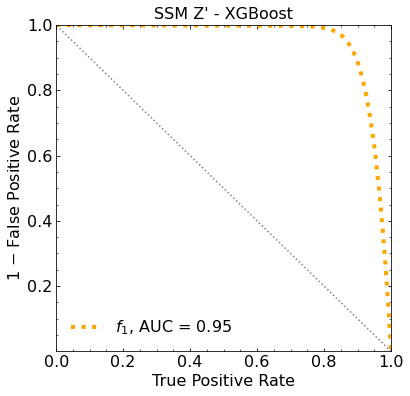

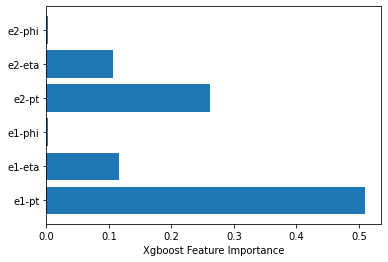

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63493	validation_1-logloss:0.63507
[1]	validation_0-logloss:0.58670	validation_1-logloss:0.58701
[2]	validation_0-logloss:0.54598	validation_1-logloss:0.54639
[3]	validation_0-logloss:0.51198	validation_1-logloss:0.51232
[4]	validation_0-logloss:0.48206	validation_1-logloss:0.48257
[5]	validation_0-logloss:0.45671	validation_1-logloss:0.45718
[6]	validation_0-logloss:0.43441	validation_1-logloss:0.43495
[7]	validation_0-logloss:0.41526	validation_1-logloss:0.41589
[8]	validation_0-logloss:0.39817	validation_1-logloss:0.39890
[9]	validation_0-logloss:0.38314	validation_1-logloss:0.38399
[10]	validation_0-logloss:0.37006	validation_1-logloss:0.37104
[11]	validation_0-logloss:0.35880	validation_1-logloss:0.35987
[12]	validation_0-logloss:0.34848	validation_1-logloss:0.34946
[13]	validation_0-logloss:0.33938	validation_1-logloss:0.34051
[14]	validation_0-logloss:0.33077	validation_1-logloss:0.33197
[15]	validation_0-logloss:0.32383	validation_1-logloss:0.32497
[1

[130]	validation_0-logloss:0.23493	validation_1-logloss:0.24026
[131]	validation_0-logloss:0.23489	validation_1-logloss:0.24025
[132]	validation_0-logloss:0.23486	validation_1-logloss:0.24025
[133]	validation_0-logloss:0.23485	validation_1-logloss:0.24025
[134]	validation_0-logloss:0.23481	validation_1-logloss:0.24025
[135]	validation_0-logloss:0.23477	validation_1-logloss:0.24025
[136]	validation_0-logloss:0.23472	validation_1-logloss:0.24025
[137]	validation_0-logloss:0.23465	validation_1-logloss:0.24024
[138]	validation_0-logloss:0.23463	validation_1-logloss:0.24023
[139]	validation_0-logloss:0.23459	validation_1-logloss:0.24023
[140]	validation_0-logloss:0.23454	validation_1-logloss:0.24021
[141]	validation_0-logloss:0.23452	validation_1-logloss:0.24021
[142]	validation_0-logloss:0.23447	validation_1-logloss:0.24020
[143]	validation_0-logloss:0.23444	validation_1-logloss:0.24020
[144]	validation_0-logloss:0.23440	validation_1-logloss:0.24020
[145]	validation_0-logloss:0.23438	valid

[259]	validation_0-logloss:0.23077	validation_1-logloss:0.24008
[260]	validation_0-logloss:0.23075	validation_1-logloss:0.24008
[261]	validation_0-logloss:0.23071	validation_1-logloss:0.24008
[262]	validation_0-logloss:0.23069	validation_1-logloss:0.24008
[263]	validation_0-logloss:0.23065	validation_1-logloss:0.24008
[264]	validation_0-logloss:0.23063	validation_1-logloss:0.24008
[265]	validation_0-logloss:0.23062	validation_1-logloss:0.24008
[266]	validation_0-logloss:0.23058	validation_1-logloss:0.24008
[267]	validation_0-logloss:0.23055	validation_1-logloss:0.24009
[268]	validation_0-logloss:0.23052	validation_1-logloss:0.24009
[269]	validation_0-logloss:0.23048	validation_1-logloss:0.24008
[270]	validation_0-logloss:0.23044	validation_1-logloss:0.24008
[271]	validation_0-logloss:0.23042	validation_1-logloss:0.24008
[272]	validation_0-logloss:0.23039	validation_1-logloss:0.24008
[273]	validation_0-logloss:0.23036	validation_1-logloss:0.24008
[274]	validation_0-logloss:0.23034	valid

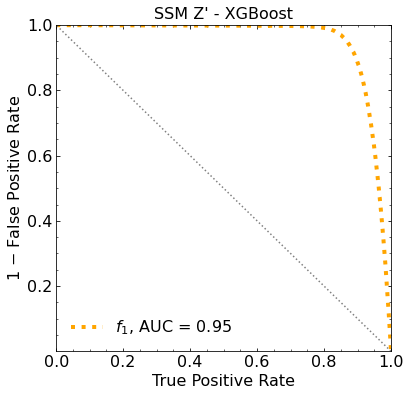


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63517	validation_1-logloss:0.63530
[1]	validation_0-logloss:0.58653	validation_1-logloss:0.58668
[2]	validation_0-logloss:0.54605	validation_1-logloss:0.54614
[3]	validation_0-logloss:0.51169	validation_1-logloss:0.51186
[4]	validation_0-logloss:0.48272	validation_1-logloss:0.48290
[5]	validation_0-logloss:0.45739	validation_1-logloss:0.45755
[6]	validation_0-logloss:0.43510	validation_1-logloss:0.43536
[7]	validation_0-logloss:0.41608	validation_1-logloss:0.41631
[8]	validation_0-logloss:0.39919	validation_1-logloss:0.39941
[9]	validation_0-logloss:0.38508	validation_1-logloss:0.38532
[10]	validation_0-logloss:0.37176	validation_1-logloss:0.37212
[11]	validation_0-logloss:0.36019	validation_1-logloss:0.36054
[12]	validation_0-logloss:0.34982	validation_1-logloss:0.35024
[13]	validation_0-logloss:0.34088	validation_1-logloss:0.34131
[14]	validation_0-logloss:0.33296	validation_1-logloss:0.33333
[15]	validation_0-logloss:0.32562	validation_1-logloss:0.32608
[1

[130]	validation_0-logloss:0.23641	validation_1-logloss:0.24053
[131]	validation_0-logloss:0.23637	validation_1-logloss:0.24053
[132]	validation_0-logloss:0.23633	validation_1-logloss:0.24052
[133]	validation_0-logloss:0.23632	validation_1-logloss:0.24052
[134]	validation_0-logloss:0.23629	validation_1-logloss:0.24052
[135]	validation_0-logloss:0.23620	validation_1-logloss:0.24045
[136]	validation_0-logloss:0.23617	validation_1-logloss:0.24045
[137]	validation_0-logloss:0.23612	validation_1-logloss:0.24045
[138]	validation_0-logloss:0.23608	validation_1-logloss:0.24045
[139]	validation_0-logloss:0.23604	validation_1-logloss:0.24044
[140]	validation_0-logloss:0.23599	validation_1-logloss:0.24043
[141]	validation_0-logloss:0.23595	validation_1-logloss:0.24043
[142]	validation_0-logloss:0.23591	validation_1-logloss:0.24041
[143]	validation_0-logloss:0.23588	validation_1-logloss:0.24041
[144]	validation_0-logloss:0.23585	validation_1-logloss:0.24040
[145]	validation_0-logloss:0.23583	valid

[259]	validation_0-logloss:0.23215	validation_1-logloss:0.24021
[260]	validation_0-logloss:0.23213	validation_1-logloss:0.24021
[261]	validation_0-logloss:0.23210	validation_1-logloss:0.24022
[262]	validation_0-logloss:0.23205	validation_1-logloss:0.24021
[263]	validation_0-logloss:0.23200	validation_1-logloss:0.24021
[264]	validation_0-logloss:0.23197	validation_1-logloss:0.24020
[265]	validation_0-logloss:0.23195	validation_1-logloss:0.24020
[266]	validation_0-logloss:0.23194	validation_1-logloss:0.24021
[267]	validation_0-logloss:0.23190	validation_1-logloss:0.24019
[268]	validation_0-logloss:0.23187	validation_1-logloss:0.24019
[269]	validation_0-logloss:0.23181	validation_1-logloss:0.24017
[270]	validation_0-logloss:0.23178	validation_1-logloss:0.24018
[271]	validation_0-logloss:0.23177	validation_1-logloss:0.24018
[272]	validation_0-logloss:0.23175	validation_1-logloss:0.24017
[273]	validation_0-logloss:0.23171	validation_1-logloss:0.24017
[274]	validation_0-logloss:0.23167	valid

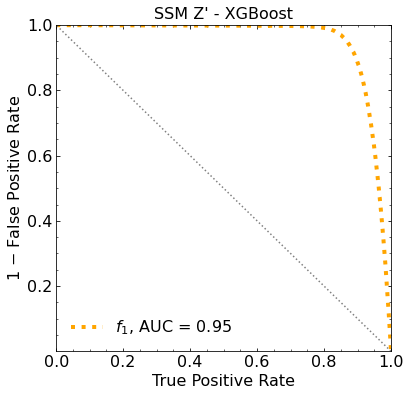


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63556	validation_1-logloss:0.63533
[1]	validation_0-logloss:0.58660	validation_1-logloss:0.58677
[2]	validation_0-logloss:0.54631	validation_1-logloss:0.54646
[3]	validation_0-logloss:0.51240	validation_1-logloss:0.51238
[4]	validation_0-logloss:0.48286	validation_1-logloss:0.48300
[5]	validation_0-logloss:0.45745	validation_1-logloss:0.45757
[6]	validation_0-logloss:0.43516	validation_1-logloss:0.43528
[7]	validation_0-logloss:0.41640	validation_1-logloss:0.41652
[8]	validation_0-logloss:0.39908	validation_1-logloss:0.39934
[9]	validation_0-logloss:0.38423	validation_1-logloss:0.38446
[10]	validation_0-logloss:0.37144	validation_1-logloss:0.37169
[11]	validation_0-logloss:0.35982	validation_1-logloss:0.36010
[12]	validation_0-logloss:0.34946	validation_1-logloss:0.34980
[13]	validation_0-logloss:0.34061	validation_1-logloss:0.34096
[14]	validation_0-logloss:0.33270	validation_1-logloss:0.33301
[15]	validation_0-logloss:0.32507	validation_1-logloss:0.32548
[1

[130]	validation_0-logloss:0.23643	validation_1-logloss:0.24042
[131]	validation_0-logloss:0.23637	validation_1-logloss:0.24041
[132]	validation_0-logloss:0.23635	validation_1-logloss:0.24041
[133]	validation_0-logloss:0.23632	validation_1-logloss:0.24040
[134]	validation_0-logloss:0.23628	validation_1-logloss:0.24038
[135]	validation_0-logloss:0.23625	validation_1-logloss:0.24038
[136]	validation_0-logloss:0.23621	validation_1-logloss:0.24038
[137]	validation_0-logloss:0.23618	validation_1-logloss:0.24038
[138]	validation_0-logloss:0.23613	validation_1-logloss:0.24038
[139]	validation_0-logloss:0.23609	validation_1-logloss:0.24039
[140]	validation_0-logloss:0.23606	validation_1-logloss:0.24038
[141]	validation_0-logloss:0.23603	validation_1-logloss:0.24038
[142]	validation_0-logloss:0.23600	validation_1-logloss:0.24037
[143]	validation_0-logloss:0.23596	validation_1-logloss:0.24038
[144]	validation_0-logloss:0.23592	validation_1-logloss:0.24038
[145]	validation_0-logloss:0.23587	valid

[259]	validation_0-logloss:0.23252	validation_1-logloss:0.24025
[260]	validation_0-logloss:0.23250	validation_1-logloss:0.24025
[261]	validation_0-logloss:0.23248	validation_1-logloss:0.24025
[262]	validation_0-logloss:0.23243	validation_1-logloss:0.24025
[263]	validation_0-logloss:0.23238	validation_1-logloss:0.24024
[264]	validation_0-logloss:0.23236	validation_1-logloss:0.24024
[265]	validation_0-logloss:0.23233	validation_1-logloss:0.24025
[266]	validation_0-logloss:0.23231	validation_1-logloss:0.24025
[267]	validation_0-logloss:0.23230	validation_1-logloss:0.24025
[268]	validation_0-logloss:0.23226	validation_1-logloss:0.24025
[269]	validation_0-logloss:0.23222	validation_1-logloss:0.24026
[270]	validation_0-logloss:0.23220	validation_1-logloss:0.24026
[271]	validation_0-logloss:0.23218	validation_1-logloss:0.24026
[272]	validation_0-logloss:0.23213	validation_1-logloss:0.24025
[273]	validation_0-logloss:0.23212	validation_1-logloss:0.24025
[274]	validation_0-logloss:0.23210	valid

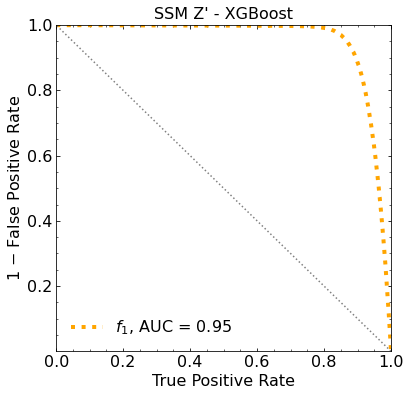


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63514	validation_1-logloss:0.63521
[1]	validation_0-logloss:0.58728	validation_1-logloss:0.58731
[2]	validation_0-logloss:0.54701	validation_1-logloss:0.54687
[3]	validation_0-logloss:0.51214	validation_1-logloss:0.51221
[4]	validation_0-logloss:0.48301	validation_1-logloss:0.48296
[5]	validation_0-logloss:0.45742	validation_1-logloss:0.45747
[6]	validation_0-logloss:0.43560	validation_1-logloss:0.43568
[7]	validation_0-logloss:0.41657	validation_1-logloss:0.41672
[8]	validation_0-logloss:0.39929	validation_1-logloss:0.39949
[9]	validation_0-logloss:0.38466	validation_1-logloss:0.38496
[10]	validation_0-logloss:0.37126	validation_1-logloss:0.37167
[11]	validation_0-logloss:0.35970	validation_1-logloss:0.36017
[12]	validation_0-logloss:0.34966	validation_1-logloss:0.35009
[13]	validation_0-logloss:0.34013	validation_1-logloss:0.34058
[14]	validation_0-logloss:0.33190	validation_1-logloss:0.33247
[15]	validation_0-logloss:0.32465	validation_1-logloss:0.32519
[1

[130]	validation_0-logloss:0.23624	validation_1-logloss:0.24047
[131]	validation_0-logloss:0.23623	validation_1-logloss:0.24047
[132]	validation_0-logloss:0.23619	validation_1-logloss:0.24046
[133]	validation_0-logloss:0.23617	validation_1-logloss:0.24046
[134]	validation_0-logloss:0.23614	validation_1-logloss:0.24046
[135]	validation_0-logloss:0.23611	validation_1-logloss:0.24045
[136]	validation_0-logloss:0.23607	validation_1-logloss:0.24042
[137]	validation_0-logloss:0.23603	validation_1-logloss:0.24042
[138]	validation_0-logloss:0.23600	validation_1-logloss:0.24042
[139]	validation_0-logloss:0.23596	validation_1-logloss:0.24042
[140]	validation_0-logloss:0.23587	validation_1-logloss:0.24037
[141]	validation_0-logloss:0.23585	validation_1-logloss:0.24037
[142]	validation_0-logloss:0.23581	validation_1-logloss:0.24037
[143]	validation_0-logloss:0.23578	validation_1-logloss:0.24037
[144]	validation_0-logloss:0.23570	validation_1-logloss:0.24032
[145]	validation_0-logloss:0.23566	valid

[259]	validation_0-logloss:0.23214	validation_1-logloss:0.24020
[260]	validation_0-logloss:0.23211	validation_1-logloss:0.24020
[261]	validation_0-logloss:0.23209	validation_1-logloss:0.24021
[262]	validation_0-logloss:0.23206	validation_1-logloss:0.24021
[263]	validation_0-logloss:0.23206	validation_1-logloss:0.24021
[264]	validation_0-logloss:0.23204	validation_1-logloss:0.24020
[265]	validation_0-logloss:0.23199	validation_1-logloss:0.24019
[266]	validation_0-logloss:0.23196	validation_1-logloss:0.24020
[267]	validation_0-logloss:0.23192	validation_1-logloss:0.24021
[268]	validation_0-logloss:0.23190	validation_1-logloss:0.24022
[269]	validation_0-logloss:0.23189	validation_1-logloss:0.24021
[270]	validation_0-logloss:0.23188	validation_1-logloss:0.24022
[271]	validation_0-logloss:0.23185	validation_1-logloss:0.24022
[272]	validation_0-logloss:0.23183	validation_1-logloss:0.24022
[273]	validation_0-logloss:0.23179	validation_1-logloss:0.24021
[274]	validation_0-logloss:0.23176	valid

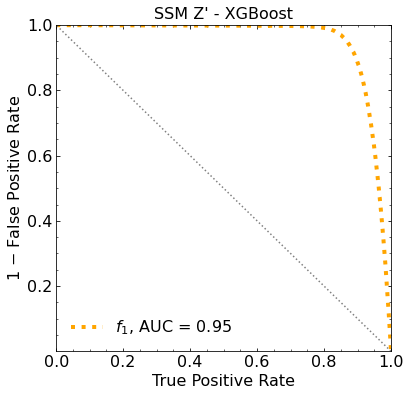


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63524	validation_1-logloss:0.63533
[1]	validation_0-logloss:0.58701	validation_1-logloss:0.58718
[2]	validation_0-logloss:0.54663	validation_1-logloss:0.54670
[3]	validation_0-logloss:0.51221	validation_1-logloss:0.51226
[4]	validation_0-logloss:0.48252	validation_1-logloss:0.48268
[5]	validation_0-logloss:0.45737	validation_1-logloss:0.45752
[6]	validation_0-logloss:0.43533	validation_1-logloss:0.43551
[7]	validation_0-logloss:0.41602	validation_1-logloss:0.41630
[8]	validation_0-logloss:0.39874	validation_1-logloss:0.39905
[9]	validation_0-logloss:0.38391	validation_1-logloss:0.38442
[10]	validation_0-logloss:0.37130	validation_1-logloss:0.37177
[11]	validation_0-logloss:0.36033	validation_1-logloss:0.36088
[12]	validation_0-logloss:0.34988	validation_1-logloss:0.35047
[13]	validation_0-logloss:0.34066	validation_1-logloss:0.34137
[14]	validation_0-logloss:0.33281	validation_1-logloss:0.33353
[15]	validation_0-logloss:0.32536	validation_1-logloss:0.32607
[1

[130]	validation_0-logloss:0.23587	validation_1-logloss:0.24038
[131]	validation_0-logloss:0.23582	validation_1-logloss:0.24035
[132]	validation_0-logloss:0.23579	validation_1-logloss:0.24035
[133]	validation_0-logloss:0.23574	validation_1-logloss:0.24035
[134]	validation_0-logloss:0.23570	validation_1-logloss:0.24034
[135]	validation_0-logloss:0.23568	validation_1-logloss:0.24034
[136]	validation_0-logloss:0.23563	validation_1-logloss:0.24033
[137]	validation_0-logloss:0.23560	validation_1-logloss:0.24033
[138]	validation_0-logloss:0.23557	validation_1-logloss:0.24033
[139]	validation_0-logloss:0.23553	validation_1-logloss:0.24033
[140]	validation_0-logloss:0.23550	validation_1-logloss:0.24032
[141]	validation_0-logloss:0.23547	validation_1-logloss:0.24031
[142]	validation_0-logloss:0.23544	validation_1-logloss:0.24032
[143]	validation_0-logloss:0.23541	validation_1-logloss:0.24031
[144]	validation_0-logloss:0.23538	validation_1-logloss:0.24031
[145]	validation_0-logloss:0.23534	valid

[259]	validation_0-logloss:0.23203	validation_1-logloss:0.24014
[260]	validation_0-logloss:0.23202	validation_1-logloss:0.24014
[261]	validation_0-logloss:0.23198	validation_1-logloss:0.24013
[262]	validation_0-logloss:0.23195	validation_1-logloss:0.24013
[263]	validation_0-logloss:0.23192	validation_1-logloss:0.24013
[264]	validation_0-logloss:0.23190	validation_1-logloss:0.24013
[265]	validation_0-logloss:0.23190	validation_1-logloss:0.24013
[266]	validation_0-logloss:0.23187	validation_1-logloss:0.24013
[267]	validation_0-logloss:0.23183	validation_1-logloss:0.24013
[268]	validation_0-logloss:0.23181	validation_1-logloss:0.24013
[269]	validation_0-logloss:0.23179	validation_1-logloss:0.24013
[270]	validation_0-logloss:0.23179	validation_1-logloss:0.24013
[271]	validation_0-logloss:0.23177	validation_1-logloss:0.24013
[272]	validation_0-logloss:0.23172	validation_1-logloss:0.24012
[273]	validation_0-logloss:0.23170	validation_1-logloss:0.24012
[274]	validation_0-logloss:0.23167	valid

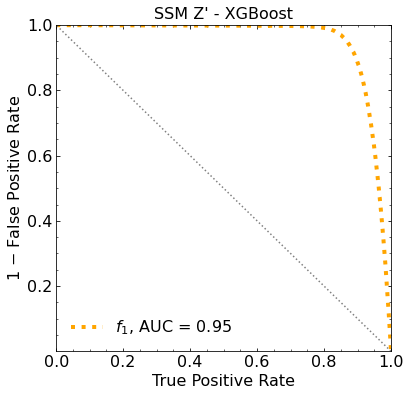


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63513	validation_1-logloss:0.63527
[1]	validation_0-logloss:0.58724	validation_1-logloss:0.58749
[2]	validation_0-logloss:0.54686	validation_1-logloss:0.54705
[3]	validation_0-logloss:0.51220	validation_1-logloss:0.51230
[4]	validation_0-logloss:0.48284	validation_1-logloss:0.48315
[5]	validation_0-logloss:0.45685	validation_1-logloss:0.45716
[6]	validation_0-logloss:0.43480	validation_1-logloss:0.43510
[7]	validation_0-logloss:0.41488	validation_1-logloss:0.41519
[8]	validation_0-logloss:0.39834	validation_1-logloss:0.39877
[9]	validation_0-logloss:0.38362	validation_1-logloss:0.38415
[10]	validation_0-logloss:0.37127	validation_1-logloss:0.37184
[11]	validation_0-logloss:0.35925	validation_1-logloss:0.35992
[12]	validation_0-logloss:0.34895	validation_1-logloss:0.34973
[13]	validation_0-logloss:0.33978	validation_1-logloss:0.34059
[14]	validation_0-logloss:0.33154	validation_1-logloss:0.33245
[15]	validation_0-logloss:0.32417	validation_1-logloss:0.32513
[1

[130]	validation_0-logloss:0.23572	validation_1-logloss:0.24041
[131]	validation_0-logloss:0.23569	validation_1-logloss:0.24042
[132]	validation_0-logloss:0.23565	validation_1-logloss:0.24041
[133]	validation_0-logloss:0.23561	validation_1-logloss:0.24041
[134]	validation_0-logloss:0.23558	validation_1-logloss:0.24040
[135]	validation_0-logloss:0.23552	validation_1-logloss:0.24039
[136]	validation_0-logloss:0.23549	validation_1-logloss:0.24039
[137]	validation_0-logloss:0.23545	validation_1-logloss:0.24039
[138]	validation_0-logloss:0.23541	validation_1-logloss:0.24039
[139]	validation_0-logloss:0.23537	validation_1-logloss:0.24037
[140]	validation_0-logloss:0.23534	validation_1-logloss:0.24038
[141]	validation_0-logloss:0.23532	validation_1-logloss:0.24037
[142]	validation_0-logloss:0.23528	validation_1-logloss:0.24037
[143]	validation_0-logloss:0.23525	validation_1-logloss:0.24036
[144]	validation_0-logloss:0.23521	validation_1-logloss:0.24035
[145]	validation_0-logloss:0.23517	valid

[259]	validation_0-logloss:0.23162	validation_1-logloss:0.24018
[260]	validation_0-logloss:0.23159	validation_1-logloss:0.24018
[261]	validation_0-logloss:0.23155	validation_1-logloss:0.24018
[262]	validation_0-logloss:0.23151	validation_1-logloss:0.24018
[263]	validation_0-logloss:0.23146	validation_1-logloss:0.24019
[264]	validation_0-logloss:0.23143	validation_1-logloss:0.24019
[265]	validation_0-logloss:0.23140	validation_1-logloss:0.24019
[266]	validation_0-logloss:0.23136	validation_1-logloss:0.24018
[267]	validation_0-logloss:0.23133	validation_1-logloss:0.24018
[268]	validation_0-logloss:0.23131	validation_1-logloss:0.24019
[269]	validation_0-logloss:0.23127	validation_1-logloss:0.24019
[270]	validation_0-logloss:0.23124	validation_1-logloss:0.24021
[271]	validation_0-logloss:0.23122	validation_1-logloss:0.24020
[272]	validation_0-logloss:0.23117	validation_1-logloss:0.24018
[273]	validation_0-logloss:0.23116	validation_1-logloss:0.24019


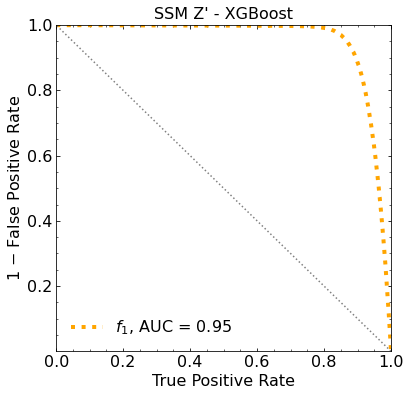


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63511	validation_1-logloss:0.63523
[1]	validation_0-logloss:0.58703	validation_1-logloss:0.58723
[2]	validation_0-logloss:0.54651	validation_1-logloss:0.54675
[3]	validation_0-logloss:0.51228	validation_1-logloss:0.51254
[4]	validation_0-logloss:0.48324	validation_1-logloss:0.48348
[5]	validation_0-logloss:0.45744	validation_1-logloss:0.45770
[6]	validation_0-logloss:0.43518	validation_1-logloss:0.43552
[7]	validation_0-logloss:0.41595	validation_1-logloss:0.41642
[8]	validation_0-logloss:0.39870	validation_1-logloss:0.39921
[9]	validation_0-logloss:0.38399	validation_1-logloss:0.38461
[10]	validation_0-logloss:0.37102	validation_1-logloss:0.37176
[11]	validation_0-logloss:0.35942	validation_1-logloss:0.36021
[12]	validation_0-logloss:0.34964	validation_1-logloss:0.35039
[13]	validation_0-logloss:0.34039	validation_1-logloss:0.34122
[14]	validation_0-logloss:0.33196	validation_1-logloss:0.33288
[15]	validation_0-logloss:0.32452	validation_1-logloss:0.32549
[1

[130]	validation_0-logloss:0.23559	validation_1-logloss:0.24037
[131]	validation_0-logloss:0.23555	validation_1-logloss:0.24036
[132]	validation_0-logloss:0.23552	validation_1-logloss:0.24036
[133]	validation_0-logloss:0.23548	validation_1-logloss:0.24035
[134]	validation_0-logloss:0.23544	validation_1-logloss:0.24034
[135]	validation_0-logloss:0.23539	validation_1-logloss:0.24032
[136]	validation_0-logloss:0.23536	validation_1-logloss:0.24033
[137]	validation_0-logloss:0.23533	validation_1-logloss:0.24032
[138]	validation_0-logloss:0.23530	validation_1-logloss:0.24032
[139]	validation_0-logloss:0.23528	validation_1-logloss:0.24031
[140]	validation_0-logloss:0.23523	validation_1-logloss:0.24031
[141]	validation_0-logloss:0.23519	validation_1-logloss:0.24031
[142]	validation_0-logloss:0.23514	validation_1-logloss:0.24030
[143]	validation_0-logloss:0.23512	validation_1-logloss:0.24031
[144]	validation_0-logloss:0.23508	validation_1-logloss:0.24030
[145]	validation_0-logloss:0.23507	valid

[259]	validation_0-logloss:0.23177	validation_1-logloss:0.24009
[260]	validation_0-logloss:0.23175	validation_1-logloss:0.24009
[261]	validation_0-logloss:0.23172	validation_1-logloss:0.24008
[262]	validation_0-logloss:0.23170	validation_1-logloss:0.24008
[263]	validation_0-logloss:0.23167	validation_1-logloss:0.24008
[264]	validation_0-logloss:0.23163	validation_1-logloss:0.24009
[265]	validation_0-logloss:0.23160	validation_1-logloss:0.24009
[266]	validation_0-logloss:0.23158	validation_1-logloss:0.24009
[267]	validation_0-logloss:0.23157	validation_1-logloss:0.24010
[268]	validation_0-logloss:0.23157	validation_1-logloss:0.24010
[269]	validation_0-logloss:0.23155	validation_1-logloss:0.24010


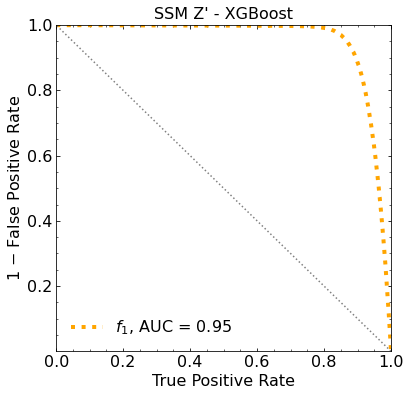


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63512	validation_1-logloss:0.63513
[1]	validation_0-logloss:0.58705	validation_1-logloss:0.58706
[2]	validation_0-logloss:0.54671	validation_1-logloss:0.54688
[3]	validation_0-logloss:0.51250	validation_1-logloss:0.51275
[4]	validation_0-logloss:0.48312	validation_1-logloss:0.48333
[5]	validation_0-logloss:0.45769	validation_1-logloss:0.45786
[6]	validation_0-logloss:0.43523	validation_1-logloss:0.43552
[7]	validation_0-logloss:0.41638	validation_1-logloss:0.41665
[8]	validation_0-logloss:0.39915	validation_1-logloss:0.39949
[9]	validation_0-logloss:0.38423	validation_1-logloss:0.38465
[10]	validation_0-logloss:0.37129	validation_1-logloss:0.37181
[11]	validation_0-logloss:0.35961	validation_1-logloss:0.36015
[12]	validation_0-logloss:0.34800	validation_1-logloss:0.34863
[13]	validation_0-logloss:0.33901	validation_1-logloss:0.33965
[14]	validation_0-logloss:0.33075	validation_1-logloss:0.33148
[15]	validation_0-logloss:0.32315	validation_1-logloss:0.32396
[1

[130]	validation_0-logloss:0.23541	validation_1-logloss:0.24054
[131]	validation_0-logloss:0.23539	validation_1-logloss:0.24053
[132]	validation_0-logloss:0.23531	validation_1-logloss:0.24050
[133]	validation_0-logloss:0.23527	validation_1-logloss:0.24050
[134]	validation_0-logloss:0.23524	validation_1-logloss:0.24049
[135]	validation_0-logloss:0.23522	validation_1-logloss:0.24049
[136]	validation_0-logloss:0.23517	validation_1-logloss:0.24047
[137]	validation_0-logloss:0.23513	validation_1-logloss:0.24047
[138]	validation_0-logloss:0.23511	validation_1-logloss:0.24048
[139]	validation_0-logloss:0.23506	validation_1-logloss:0.24047
[140]	validation_0-logloss:0.23504	validation_1-logloss:0.24047
[141]	validation_0-logloss:0.23499	validation_1-logloss:0.24044
[142]	validation_0-logloss:0.23495	validation_1-logloss:0.24044
[143]	validation_0-logloss:0.23492	validation_1-logloss:0.24044
[144]	validation_0-logloss:0.23487	validation_1-logloss:0.24044
[145]	validation_0-logloss:0.23486	valid

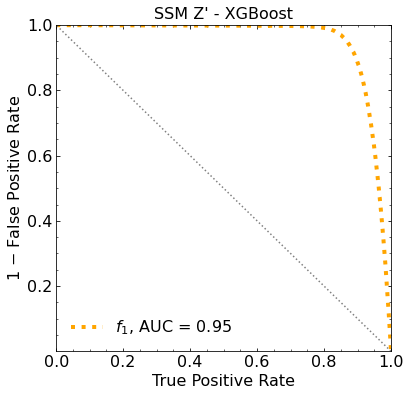


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63544	validation_1-logloss:0.63524
[1]	validation_0-logloss:0.58714	validation_1-logloss:0.58723
[2]	validation_0-logloss:0.54727	validation_1-logloss:0.54708
[3]	validation_0-logloss:0.51251	validation_1-logloss:0.51237
[4]	validation_0-logloss:0.48338	validation_1-logloss:0.48306
[5]	validation_0-logloss:0.45793	validation_1-logloss:0.45774
[6]	validation_0-logloss:0.43586	validation_1-logloss:0.43577
[7]	validation_0-logloss:0.41642	validation_1-logloss:0.41630
[8]	validation_0-logloss:0.40002	validation_1-logloss:0.39986
[9]	validation_0-logloss:0.38542	validation_1-logloss:0.38523
[10]	validation_0-logloss:0.37221	validation_1-logloss:0.37212
[11]	validation_0-logloss:0.36063	validation_1-logloss:0.36045
[12]	validation_0-logloss:0.35041	validation_1-logloss:0.35028
[13]	validation_0-logloss:0.34102	validation_1-logloss:0.34097
[14]	validation_0-logloss:0.33302	validation_1-logloss:0.33294
[15]	validation_0-logloss:0.32551	validation_1-logloss:0.32547
[1

[130]	validation_0-logloss:0.23688	validation_1-logloss:0.24044
[131]	validation_0-logloss:0.23686	validation_1-logloss:0.24043
[132]	validation_0-logloss:0.23683	validation_1-logloss:0.24043
[133]	validation_0-logloss:0.23681	validation_1-logloss:0.24043
[134]	validation_0-logloss:0.23678	validation_1-logloss:0.24042
[135]	validation_0-logloss:0.23669	validation_1-logloss:0.24038
[136]	validation_0-logloss:0.23667	validation_1-logloss:0.24037
[137]	validation_0-logloss:0.23661	validation_1-logloss:0.24036
[138]	validation_0-logloss:0.23656	validation_1-logloss:0.24036
[139]	validation_0-logloss:0.23653	validation_1-logloss:0.24035
[140]	validation_0-logloss:0.23648	validation_1-logloss:0.24032
[141]	validation_0-logloss:0.23644	validation_1-logloss:0.24032
[142]	validation_0-logloss:0.23641	validation_1-logloss:0.24032
[143]	validation_0-logloss:0.23639	validation_1-logloss:0.24032
[144]	validation_0-logloss:0.23636	validation_1-logloss:0.24031
[145]	validation_0-logloss:0.23632	valid

[259]	validation_0-logloss:0.23299	validation_1-logloss:0.24011
[260]	validation_0-logloss:0.23297	validation_1-logloss:0.24011
[261]	validation_0-logloss:0.23294	validation_1-logloss:0.24011
[262]	validation_0-logloss:0.23290	validation_1-logloss:0.24011
[263]	validation_0-logloss:0.23286	validation_1-logloss:0.24010
[264]	validation_0-logloss:0.23284	validation_1-logloss:0.24010
[265]	validation_0-logloss:0.23280	validation_1-logloss:0.24008
[266]	validation_0-logloss:0.23276	validation_1-logloss:0.24008
[267]	validation_0-logloss:0.23272	validation_1-logloss:0.24008
[268]	validation_0-logloss:0.23270	validation_1-logloss:0.24009
[269]	validation_0-logloss:0.23267	validation_1-logloss:0.24009
[270]	validation_0-logloss:0.23266	validation_1-logloss:0.24009
[271]	validation_0-logloss:0.23264	validation_1-logloss:0.24009
[272]	validation_0-logloss:0.23263	validation_1-logloss:0.24010
[273]	validation_0-logloss:0.23259	validation_1-logloss:0.24010
[274]	validation_0-logloss:0.23256	valid

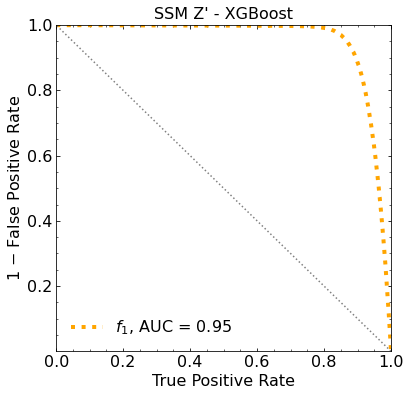


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63529	validation_1-logloss:0.63538
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.58678
[2]	validation_0-logloss:0.54664	validation_1-logloss:0.54671
[3]	validation_0-logloss:0.51267	validation_1-logloss:0.51248
[4]	validation_0-logloss:0.48300	validation_1-logloss:0.48291
[5]	validation_0-logloss:0.45716	validation_1-logloss:0.45714
[6]	validation_0-logloss:0.43526	validation_1-logloss:0.43513
[7]	validation_0-logloss:0.41557	validation_1-logloss:0.41554
[8]	validation_0-logloss:0.39879	validation_1-logloss:0.39882
[9]	validation_0-logloss:0.38412	validation_1-logloss:0.38414
[10]	validation_0-logloss:0.37110	validation_1-logloss:0.37116
[11]	validation_0-logloss:0.35975	validation_1-logloss:0.35977
[12]	validation_0-logloss:0.34920	validation_1-logloss:0.34933
[13]	validation_0-logloss:0.34003	validation_1-logloss:0.34016
[14]	validation_0-logloss:0.33197	validation_1-logloss:0.33209
[15]	validation_0-logloss:0.32462	validation_1-logloss:0.32488
[1

[130]	validation_0-logloss:0.23680	validation_1-logloss:0.24056
[131]	validation_0-logloss:0.23677	validation_1-logloss:0.24055
[132]	validation_0-logloss:0.23673	validation_1-logloss:0.24055
[133]	validation_0-logloss:0.23668	validation_1-logloss:0.24054
[134]	validation_0-logloss:0.23664	validation_1-logloss:0.24052
[135]	validation_0-logloss:0.23656	validation_1-logloss:0.24047
[136]	validation_0-logloss:0.23654	validation_1-logloss:0.24047
[137]	validation_0-logloss:0.23650	validation_1-logloss:0.24046
[138]	validation_0-logloss:0.23648	validation_1-logloss:0.24046
[139]	validation_0-logloss:0.23645	validation_1-logloss:0.24047
[140]	validation_0-logloss:0.23640	validation_1-logloss:0.24045
[141]	validation_0-logloss:0.23633	validation_1-logloss:0.24044
[142]	validation_0-logloss:0.23625	validation_1-logloss:0.24041
[143]	validation_0-logloss:0.23622	validation_1-logloss:0.24041
[144]	validation_0-logloss:0.23616	validation_1-logloss:0.24040
[145]	validation_0-logloss:0.23614	valid

[259]	validation_0-logloss:0.23254	validation_1-logloss:0.24021
[260]	validation_0-logloss:0.23252	validation_1-logloss:0.24021
[261]	validation_0-logloss:0.23247	validation_1-logloss:0.24019
[262]	validation_0-logloss:0.23245	validation_1-logloss:0.24020
[263]	validation_0-logloss:0.23245	validation_1-logloss:0.24020
[264]	validation_0-logloss:0.23242	validation_1-logloss:0.24020
[265]	validation_0-logloss:0.23237	validation_1-logloss:0.24019
[266]	validation_0-logloss:0.23236	validation_1-logloss:0.24019
[267]	validation_0-logloss:0.23231	validation_1-logloss:0.24019
[268]	validation_0-logloss:0.23229	validation_1-logloss:0.24019
[269]	validation_0-logloss:0.23227	validation_1-logloss:0.24019
[270]	validation_0-logloss:0.23222	validation_1-logloss:0.24019
[271]	validation_0-logloss:0.23219	validation_1-logloss:0.24019
[272]	validation_0-logloss:0.23218	validation_1-logloss:0.24018
[273]	validation_0-logloss:0.23215	validation_1-logloss:0.24019
[274]	validation_0-logloss:0.23214	valid

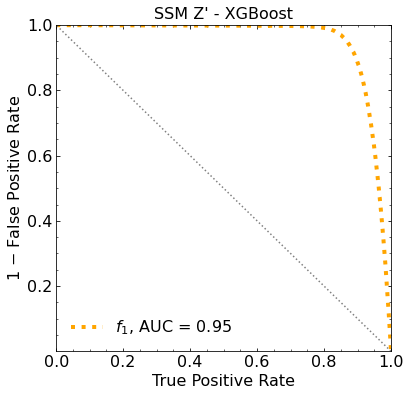


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


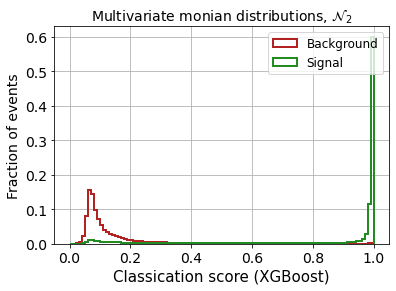

Classification score (10ML):


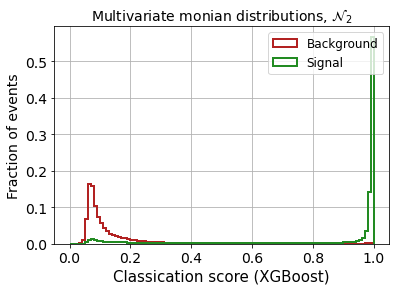

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


ntrials = 5000

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


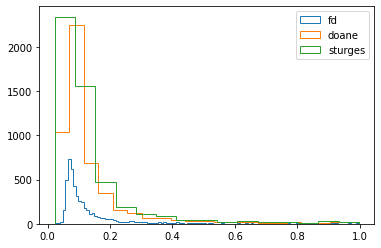

fd 115
doane 21
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.31000436189596914, 0.7523947364089542, 1.1710678437380444, 1.6976964259474292, 3.217255846383562, 4.431545059718578, 5.604645236096654, 10.801027808627092]
[0.28493797915552543, 0.694875954660092, 1.0860985580599518, 1.5822144244700576, 3.0342895975654245, 4.21152554408795, 5.359186182632491, 10.513118815284615]
[0.4068739543151959, 0.9625000575319508, 1.4673271174111229, 2.0802512612414525, 3.7573493531571303, 5.037670201936671, 6.245317332568839, 11.444532050472128]
[0.31000436189596914, 0.7523947364089542, 1.1710678437380444, 1.6976964259474292, 3.217255846383562, 4.431545059718578, 5.604645236096654, 10.801027808627092]
[0.28493797915552543, 0.694875954660092, 1.0860985580599518, 1.5822144244700576, 3.0342895975654245, 4.21152554408795, 5.359186182632491, 10.513118815284615]


In [ ]:
Z_bins_XG_CV0 = 
Z_bins_XG_CV1 = 
Z_bins_XG_CV2 = 

Z_bins_XG_CV0_zeros = 
Z_bins_XG_CV1_zeros = 
Z_bins_XG_CV2_zeros = 

<ipython-input-20-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-20-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-20-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-20-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argum

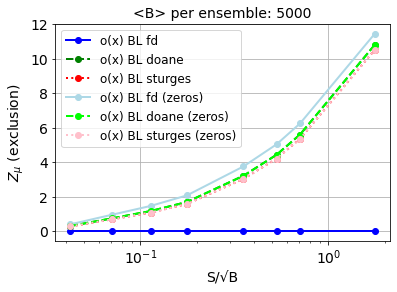

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [22]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  115


<ipython-input-22-31abcaeaab5c>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-22-31abcaeaab5c>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  115
doing Nbin:  21
doing Nbin:  15
 


In [23]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.29037209888576593, 0.887865719930014, 1.0301318151959846, 1.5668714792417413, 3.5474922348428994, 4.84768871690532, 6.009745115174738, 10.4706675700268]
[0.29556610909817155, 0.6604260493329348, 0.9410805397812453, 1.5533985289517525, 2.868547722478054, 3.1206399732935712, 5.518311208865478, 10.85041624417099]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.29037209888576593, 0.887865719930014, 1.0301318151959846, 1.5668714792417413, 3.5474922348428994, 4.84768871690532, 6.009745115174738, 10.4706675700268]
[0.29556610909817155, 0.6604260493329348, 0.9410805397812453, 1.5533985289517525, 2.868547722478054, 3.1206399732935712, 5.518311208865478, 10.85041624417099]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.2924167767721971, 0.880792028103827, 1.2255011473427617, 1.648509593973863, 3.574656615930014, 4.554611056163816, 5.677073649836645, 11.154520705828793]
[0.33982731723241, 0.6493437785727616, 0.9410805397812453, 1.4832319786086618, 3.48355746170833, 4.5971624707165635, 5.98563375036972, 10.9

In [ ]:
Z_bins_XG_CV0_chi2 = 
Z_bins_XG_CV1_chi2 = 
Z_bins_XG_CV2_chi2 = 

Z_bins_XG_CV0_chi2_N = 
Z_bins_XG_CV1_chi2_N = 
Z_bins_XG_CV2_chi2_N = 

Z_bins_XG_CV0_MSE = 
Z_bins_XG_CV1_MSE = 
Z_bins_XG_CV2_MSE = 

Z_bins_XG_CV0_poiss = 
Z_bins_XG_CV1_poiss = 
Z_bins_XG_CV2_poiss = 



Z_bins_XG_CV0_chi2_zeros = 
Z_bins_XG_CV1_chi2_zeros = 
Z_bins_XG_CV2_chi2_zeros = 

Z_bins_XG_CV0_chi2_N_zeros = 
Z_bins_XG_CV1_chi2_N_zeros = 
Z_bins_XG_CV2_chi2_N_zeros = 

Z_bins_XG_CV0_MSE_zeros = 
Z_bins_XG_CV1_MSE_zeros = 
Z_bins_XG_CV2_MSE_zeros = 

Z_bins_XG_CV0_poiss_zeros = 
Z_bins_XG_CV1_poiss_zeros = 
Z_bins_XG_CV2_poiss_zeros = 

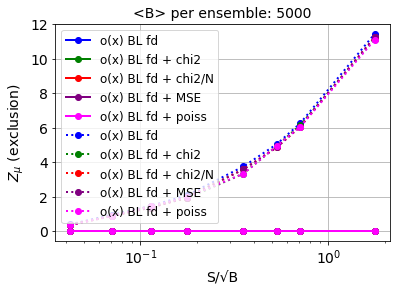

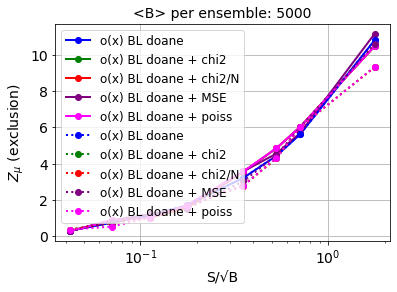

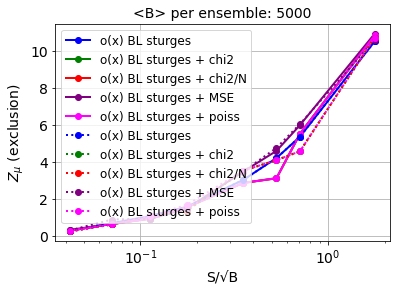

In [24]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [28]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [29]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.540515002442658
Z_bins_logbins :  0.36681405002299916

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  1.219964533676759
Z_bins_logbins :  0.8744305915396285

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  1.8012678595495184
Z_bins_logbins :  1.3419055682886645

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  2.4781624422179847
Z_bins_logbins :  1.9167342281615405

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  4.242135736897023
Z_bins_logbins :  3.5227626124658884

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  5.544781258483501
Z_bins_logbins :  4.772969803601983



In [30]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.540515002442658, 1.219964533676759, 1.8012678595495184, 2.4781624422179847, 4.242135736897023, 5.544781258483501, 6.756775771738885, 11.910156314009395]
[0.36681405002299916, 0.8744305915396285, 1.3419055682886645, 1.9167342281615405, 3.5227626124658884, 4.772969803601983, 5.964995661071329, 11.16343031715891]


In [25]:
store_Z_bins = [0.540515002442658, 1.219964533676759, 1.8012678595495184, 2.4781624422179847, 4.242135736897023, 5.544781258483501, 6.756775771738885, 11.910156314009395]

store_Z_bins_logbins = [0.36681405002299916, 0.8744305915396285, 1.3419055682886645, 1.9167342281615405, 3.5227626124658884, 4.772969803601983, 5.964995661071329, 11.16343031715891]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


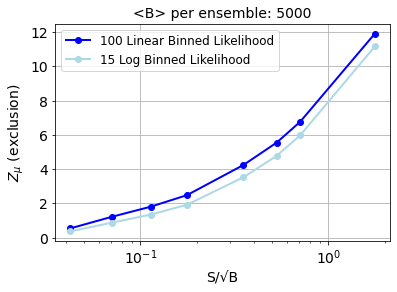

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [32]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.40485817093883664
Z_bins_XG_15bins :  0.285875198632562
Z_bins_XG_15bins_1ML :  0.281866127540429
Z_bins_XG_15bins_eq :  0.09629921508313523
Z_bins_XG_15bins_eq_1ML :  0.09625879171988484

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.9580547702583664
Z_bins_XG_15bins :  0.6970563583961149
Z_bins_XG_15bins_1ML :  0.6877444630014973
Z_bins_XG_15bins_eq :  0.2401195705414661
Z_bins_XG_15bins_eq_1ML :  0.24001904947868274

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  1.4609591614677144
Z_bins_XG_15bins :  1.0893605682832666
Z_bins_XG_15bins_1ML :  1.0754524776765586
Z_bins_XG_15bins_eq :  0.38319490566048653
Z_bins_XG_15bins_eq_1ML :  0.3830349200932229

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.

In [33]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.40485817093883664, 0.9580547702583664, 1.4609591614677144, 2.0718759987182485, 3.745070958875474, 5.02370416761486, 6.230538401178258, 11.430970995389696]
[0.285875198632562, 0.6970563583961149, 1.0893605682832666, 1.5867169948740898, 3.0417337019425625, 4.220773049693829, 5.369823925053057, 10.527361418346787]
[0.281866127540429, 0.6877444630014973, 1.0754524776765586, 1.5675627296732486, 3.010301270998032, 4.181994085320448, 5.3255423749880135, 10.470377444097288]
[0.09629921508313523, 0.2401195705414661, 0.38319490566048653, 0.5728204901158731, 1.1803572639017814, 1.7297781428917, 2.313301528101968, 5.471523773418409]
[0.09625879171988484, 0.24001904947868274, 0.3830349200932229, 0.5725821815582443, 1.1798716783392935, 1.7290735741285044, 2.312368998402441, 5.469431626020573]


In [26]:
store_Z_bins_XG = [0.40485817093883664, 0.9580547702583664, 1.4609591614677144, 2.0718759987182485, 3.745070958875474, 5.02370416761486, 6.230538401178258, 11.430970995389696]

store_Z_bins_XG_15bins = [0.285875198632562, 0.6970563583961149, 1.0893605682832666, 1.5867169948740898, 3.0417337019425625, 4.220773049693829, 5.369823925053057, 10.527361418346787]
store_Z_bins_XG_15bins_1ML = [0.281866127540429, 0.6877444630014973, 1.0754524776765586, 1.5675627296732486, 3.010301270998032, 4.181994085320448, 5.3255423749880135, 10.470377444097288]

store_Z_bins_XG_15bins_eq = [0.09629921508313523, 0.2401195705414661, 0.38319490566048653, 0.5728204901158731, 1.1803572639017814, 1.7297781428917, 2.313301528101968, 5.471523773418409]
store_Z_bins_XG_15bins_eq_1ML = [0.09625879171988484, 0.24001904947868274, 0.3830349200932229, 0.5725821815582443, 1.1798716783392935, 1.7290735741285044, 2.312368998402441, 5.469431626020573]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

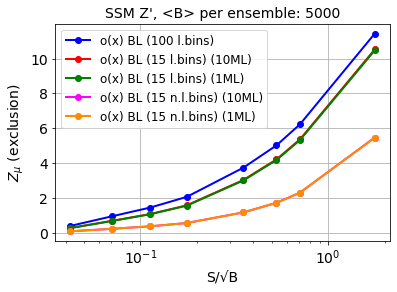

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf 15426.19952776
 15431.00031555 15432.64545917 15421.14798038 15379.01010674
 15258.17204651 14964.98893852 14414.68526961 13569.41240746
 12420.19699423 10965.56296886  9177.65392088  7005.9951304
  4525.64068524  1758.75496421 -1204.59429435 -4376.95696852]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0063479219593504735, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
 24912.85279312 24538.15925074 23876.8876263  22795.07862535
 21300.72743703 19447.68087189 17318.00206121 15002.06331192
 12558.96024561 10008.5107967   7344.26242422  4612.82357418
  1819.62997164 -1058.43560332 -3815.71773456 -5555.40598847]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


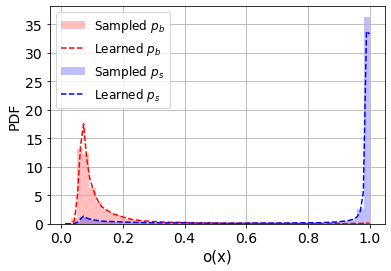


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



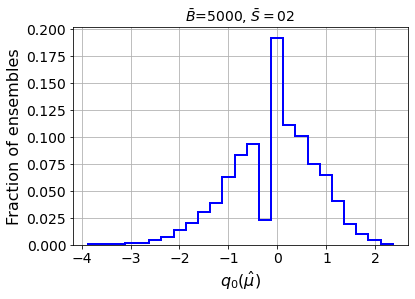

muhat mean:  0.16736709392729565
median q_muhat:  0.022236331685770105
Z_KDE:  0.14911851556989864
Z_KDE mu=0:  0.0

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



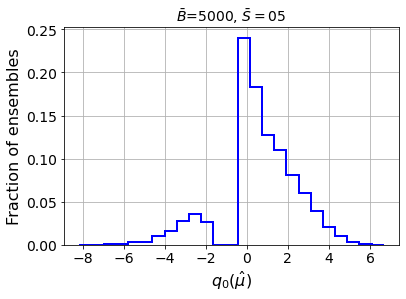

muhat mean:  0.3252259827622451
median q_muhat:  0.5291837510113098
Z_KDE:  0.7274501708098705
Z_KDE mu=0:  0.668193975084249

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



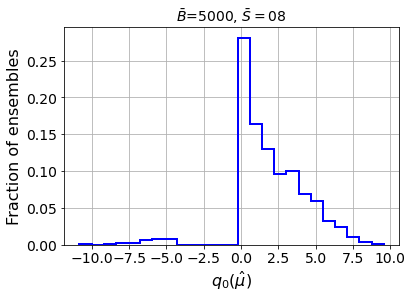

muhat mean:  0.32470044145469834
median q_muhat:  1.5347776109072644
Z_KDE:  1.238861417151759
Z_KDE mu=0:  1.204924479665469

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



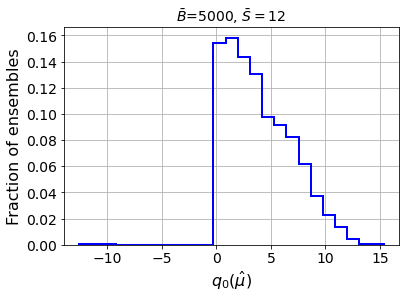

muhat mean:  0.2633172167332352
median q_muhat:  3.4120776777415234
Z_KDE:  1.8471810083858926
Z_KDE mu=0:  1.8292384654230898

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



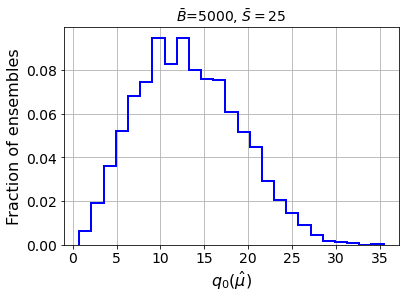

muhat mean:  0.1428361035135704
median q_muhat:  12.820165584919856
Z_KDE:  3.5805258810571186
Z_KDE mu=0:  3.578100402562895

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



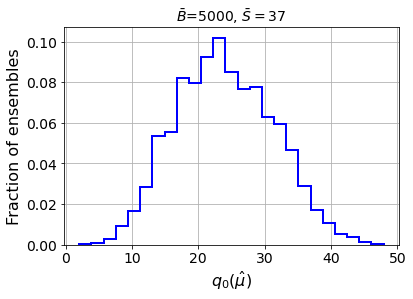

muhat mean:  0.10648284571669123
median q_muhat:  23.704451080505734
Z_KDE:  4.8687217090839905
Z_KDE mu=0:  4.885511019561551

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



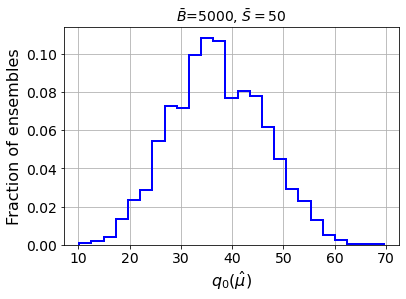

muhat mean:  0.08931426167437947
median q_muhat:  36.806571734579904
Z_KDE:  6.066841990243351
Z_KDE mu=0:  6.0982190210522

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



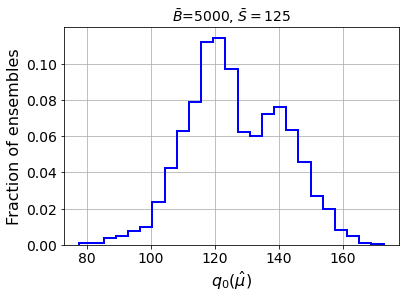

muhat mean:  0.06243676222596965
median q_muhat:  124.6135340107391
Z_KDE:  11.16304322354523
Z_KDE mu=0:  11.305337234638943

 ----------------------------------------- 



In [19]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [20]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.14911851556989864, 0.7274501708098705, 1.238861417151759, 1.8471810083858926, 3.5805258810571186, 4.8687217090839905, 6.066841990243351, 11.16304322354523]
[0.0, 0.668193975084249, 1.204924479665469, 1.8292384654230898, 3.578100402562895, 4.885511019561551, 6.0982190210522, 11.305337234638943]
[0.16736709392729565, 0.3252259827622451, 0.32470044145469834, 0.2633172167332352, 0.1428361035135704, 0.10648284571669123, 0.08931426167437947, 0.06243676222596965]


In [27]:
store_Z_MLL_KDE = [0.14911851556989864, 0.7274501708098705, 1.238861417151759, 1.8471810083858926, 3.5805258810571186, 4.8687217090839905, 6.066841990243351, 11.16304322354523]
store_Z_MLL_KDE_mu0 = [0.0, 0.668193975084249, 1.204924479665469, 1.8292384654230898, 3.578100402562895, 4.885511019561551, 6.0982190210522, 11.305337234638943]

store_muhat_mean_MLL = [0.16736709392729565, 0.3252259827622451, 0.32470044145469834, 0.2633172167332352, 0.1428361035135704, 0.10648284571669123, 0.08931426167437947, 0.06243676222596965]

##### For 1 ML

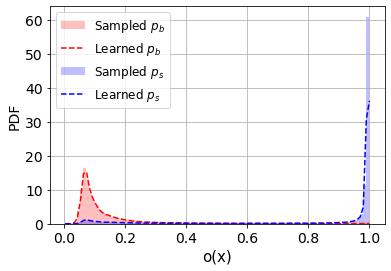


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.3975860557705607

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



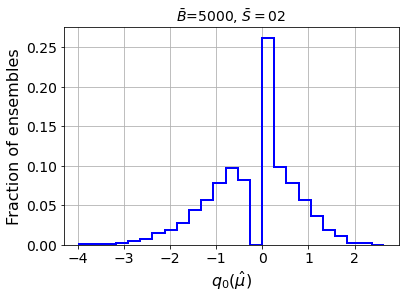

muhat mean:  0.16869090144988444
median q_muhat:  0.007863195961199776
Z_KDE:  0.08867466358097885
Z_KDE mu=0:  0.4308994900194646

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.942795502511029

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



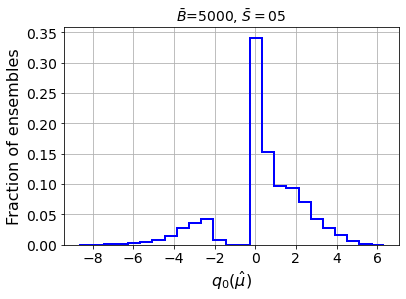

muhat mean:  0.347887323943662
median q_muhat:  0.3662276637106423
Z_KDE:  0.6051674674919681
Z_KDE mu=0:  0.4265119352332025

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  1.439882553140714

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



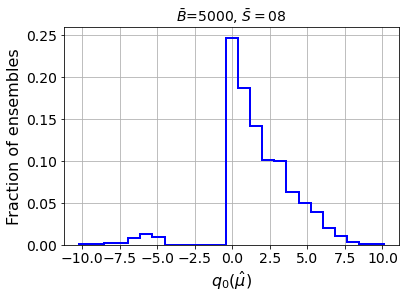

muhat mean:  0.35955434097120037
median q_muhat:  1.2942743059916832
Z_KDE:  1.1376617713502037
Z_KDE mu=0:  1.0639352486582185

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  2.0450090357335555

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



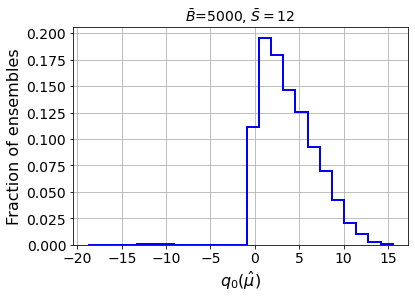

muhat mean:  0.28343493798612573
median q_muhat:  3.2930343471275805
Z_KDE:  1.8146719668104152
Z_KDE mu=0:  1.7800585785007905

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  3.706110985678521

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



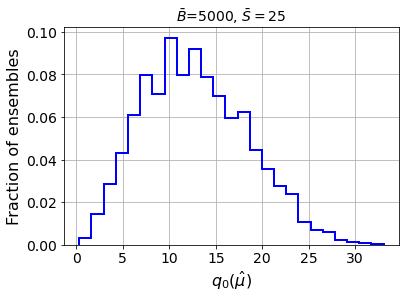

muhat mean:  0.15699558173784978
median q_muhat:  12.416949397882043
Z_KDE:  3.5237692032654526
Z_KDE mu=0:  3.504408792761899

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  4.976904187383382

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



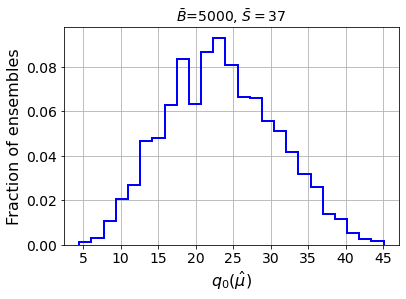

muhat mean:  0.11793306672279522
median q_muhat:  23.257519815409637
Z_KDE:  4.822605085989276
Z_KDE mu=0:  4.822937855934482

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  6.176518826113003

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



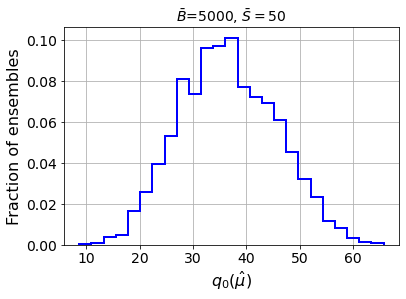

muhat mean:  0.0981909970551115
median q_muhat:  36.215945302597035
Z_KDE:  6.017968536192012
Z_KDE mu=0:  6.03868180469564

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  11.344972689800201

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



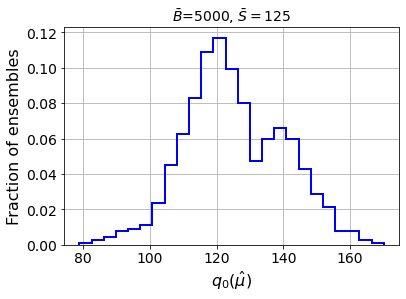

muhat mean:  0.06804384485666104
median q_muhat:  123.46395794210645
Z_KDE:  11.111433658268696
Z_KDE mu=0:  11.24789422005881

 ----------------------------------------- 



In [31]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

# bandwidth = np.logspace(-3.0, 0.05, 20)
# print(bandwidth)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
# # print(grid.best_estimator_)

# SM_bandwidth_1ML = grid.best_estimator_.bandwidth
SM_bandwidth_1ML = SM_bandwidth


# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
# print(grid.best_estimator_)

# NP_bandwidth_1ML = grid.best_estimator_.bandwidth
NP_bandwidth_1ML = NP_bandwidth






# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [32]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.3975860557705607, 0.942795502511029, 1.439882553140714, 2.0450090357335555, 3.706110985678521, 4.976904187383382, 6.176518826113003, 11.344972689800201]
[0.08867466358097885, 0.6051674674919681, 1.1376617713502037, 1.8146719668104152, 3.5237692032654526, 4.822605085989276, 6.017968536192012, 11.111433658268696]
[0.4308994900194646, 0.4265119352332025, 1.0639352486582185, 1.7800585785007905, 3.504408792761899, 4.822937855934482, 6.03868180469564, 11.24789422005881]
[0.16869090144988444, 0.347887323943662, 0.35955434097120037, 0.28343493798612573, 0.15699558173784978, 0.11793306672279522, 0.0981909970551115, 0.06804384485666104]


In [28]:
store_Z_KDE_bins = [0.3975860557705607, 0.942795502511029, 1.439882553140714, 2.0450090357335555, 3.706110985678521, 4.976904187383382, 6.176518826113003, 11.344972689800201]

store_Z_MLL_KDE_1ML = [0.08867466358097885, 0.6051674674919681, 1.1376617713502037, 1.8146719668104152, 3.5237692032654526, 4.822605085989276, 6.017968536192012, 11.111433658268696]
store_Z_MLL_KDE_mu0_1ML = [0.4308994900194646, 0.4265119352332025, 1.0639352486582185, 1.7800585785007905, 3.504408792761899, 4.822937855934482, 6.03868180469564, 11.24789422005881]

store_muhat_mean_MLL_1ML = [0.16869090144988444, 0.347887323943662, 0.35955434097120037, 0.28343493798612573, 0.15699558173784978, 0.11793306672279522, 0.0981909970551115, 0.06804384485666104]

<ipython-input-33-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-33-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


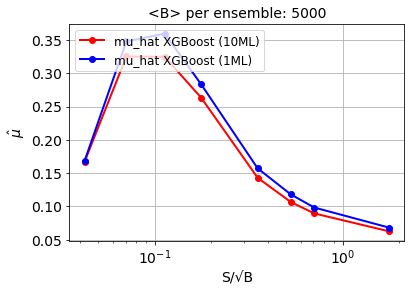

<ipython-input-33-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-33-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-33-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-33-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

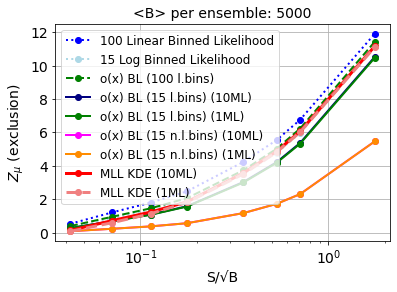

In [33]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [29]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [41]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.07777793423546475
WP:  0.5     S/B**0.5=  0.12669891816834494
WP:  0.75     S/B**0.5=  0.18420619383404438
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.19444474723291927
WP:  0.5     S/B**0.5=  0.31674708554918546
WP:  0.75     S/B**0.5=  0.460515101540458
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.3111125557250253
WP:  0.5     S/B**0.5=  0.5067990503878048
WP:  0.75     S/B**0.5=  0.7368294368295111
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.46666798536831466
WP:  0.5     S/B**0.5=  0.76019656083823
WP:  0.75     S/B**0.5=  1.1052458128661222
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.9722214351011178
WP:  0.5     S/B**0.5=  1.583734439912691

In [30]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.07777793423546475, 0.19444474723291927, 0.3111125557250253, 0.46666798536831466, 0.9722214351011178, 1.4388909933238276, 1.9444428702022356, 4.861126506555115]
SrootB_WP1_XG = [0.12669891816834494, 0.31674708554918546, 0.5067990503878048, 0.76019656083823, 1.5837344399126916, 2.343934736693289, 3.167468879825383, 7.9187418109626195]
SrootB_WP2_XG = [0.18420619383404438, 0.460515101540458, 0.7368294368295111, 1.1052458128661222, 2.30259123595134, 3.4078327527258416, 4.60518247190268, 11.513088688986588]

<ipython-input-36-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-36-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-36-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-36-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

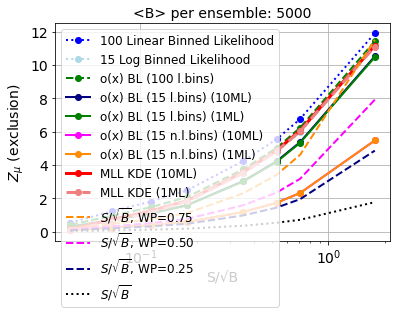

In [36]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-37-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


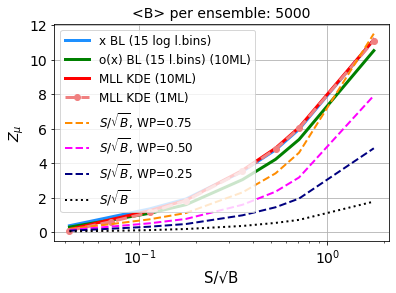

In [37]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

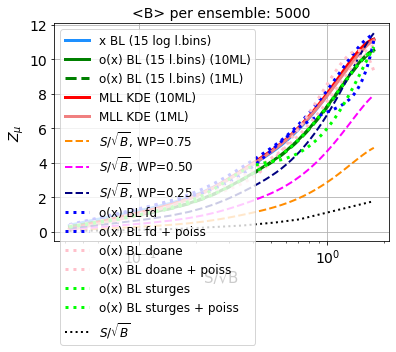

In [34]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [35]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [38]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

#bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
bins_XG_CV0_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
# bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
# bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)
bins_XG_CV0_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
# bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = 1.5*solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.385648*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results5000GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.14599539974433456 7.005621562503063 2.3352071875010213e-06
0.18342448347771395 8.801664427733622 2.9338881425778738e-06
0.15503489877194926 7.439383923597872 2.4797946411992907e-06
0.18588686030621365 8.91982212472239 2.97327404157413e-06
0.16002735249822664 7.678947920380345 2.5596493067934483e-06

0.19617873425450943 9.413679973510824 3.137893324503608e-06
0.2029674868815195 9.739439770528858 3.2464799235096194e-06
0.21350373001037995 10.245023728520547 3.415007909506849e-06
0.21350373001037995 10.245023728520547 3.415007909506849e-06
0.19954737215154741 9.575324808410288 3.1917749361367626e-06

0.169881341434251 8.151793759960011 2.717264586653337e-06
0.1831264883984264 8.787365067913843 2.9291216893046145e-06
0.1831264883984264 8.787365067913843 2.9291216893046145e-06
0.1757648362410919 8.434114560162339 2.811371520054113e-06
0.1709716105193